# Importing libraries 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import missingno

# Importing the dataset

In [0]:
train_set = pd.read_csv('/content/drive/My Drive/train.csv')
test_set = pd.read_csv('/content/drive/My Drive/test.csv')
#viewing the training data
train_set.head()

/home/ankit/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10,11,14,16,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,comp_name,website,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,...,last_funding_utc,successful_investment,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,0,Nanotecture,http://www.nanotecture.co.uk,closed,Nanotechnology,NaN,GBR,M4,London,Southampton,...,12907,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sybari,http://www.sybari.com,acquired,Email|Security|Software,1995-01-01,USA,NY,Long Island,East Northport,...,11411,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Futurederm,http://www.futurederm.com,operating,Beauty|Cosmetics|E-Commerce|Social Media,2009-06-07,USA,PA,Pittsburgh,Pittsburgh,...,16217,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Mercora,http://mercora.com,closed,Curated Web,NaN,USA,CA,SF Bay Area,Sunnyvale,...,12784,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Datos IO,http://www.datos.io,operating,Big Data|Cloud Computing|Databases|Enterprise ...,2014-06-01,USA,CA,SF Bay Area,San Jose,...,16693,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#viewing the test data
test_set.head()

,ID,comp_name,website,op_status,domain,founded_on,hq_country_code,hq_state_code,hq_region,hq_city,total_funding_usd,funding_rounds,first_funding_date,last_funding_date,num_investors,funding_duration,first_funding_utc,last_funding_utc,Unnamed: 18
0,0,MDLIVE,http://mdlive.com,operating,Health Care,2009-01-01,USA,FL,Ft. Lauderdale,Fort Lauderdale,73600000,2,2014-01-22,2015-06-24,5,518,16092,16610,NaN
1,1,APX Labs,http://apx-labs.com,operating,Software,2010-01-01,USA,VA,"Washington, D.C.",Herndon,28612936,3,2014-04-02,2015-11-18,7,595,16162,16757,NaN
2,2,9Cookies,http://www.9cookies.com/,acquired,Point of Sale|Restaurants,2012-01-01,DEU,16,Berlin,Berlin,NaN,1,2013-04-18,2013-04-18,1,0,15813,15813,NaN
3,3,Confluence Solar,http://www.confluencesolar.com,acquired,Clean Technology,NaN,USA,MO,St. Louis,Hazelwood,12700000,1,2008-09-24,2008-09-24,3,0,14146,14146,NaN
4,4,Dazo,http://dazo.in,operating,Mobile,2014-01-01,IND,19,Bangalore,Bangalore,NaN,1,2015-04-01,2015-04-01,7,0,16526,16526,NaN


## Data Pre-processing 

In [0]:
#dropping the unwanted columns
train_set = train_set.drop(columns = ['comp_name','website','founded_on','first_funding_date','last_funding_date'])
train_set = train_set.drop(columns = ['domain','hq_country_code','hq_state_code','hq_region','hq_city'])


In [0]:
#counting the null values
train_set.isnull().sum()

ID                           0
op_status                    0
total_funding_usd         7664
funding_rounds               1
num_investors                0
funding_duration             0
first_funding_utc            0
last_funding_utc             0
successful_investment        0
Unnamed: 19              40210
Unnamed: 20              40212
Unnamed: 21              40212
Unnamed: 22              40212
Unnamed: 23              40212
Unnamed: 24              40212
Unnamed: 25              40212
Unnamed: 26              40212
dtype: int64

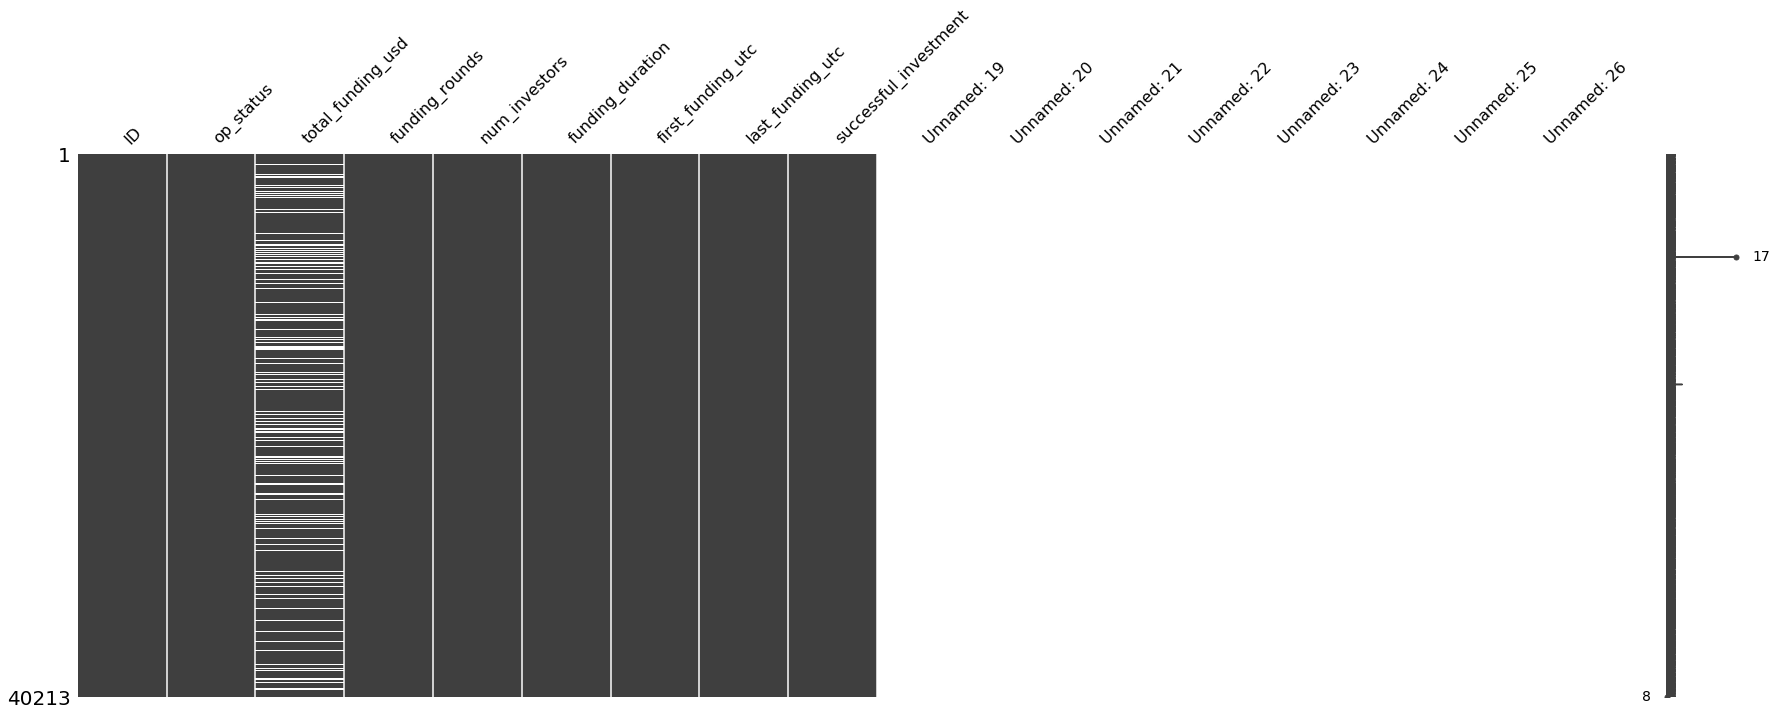

In [0]:
missingno.matrix(train_set,figsize=(30,10))

In [0]:
#viewing datatypes
train_set.dtypes

ID                         int64
op_status                 object
total_funding_usd         object
funding_rounds            object
num_investors             object
funding_duration           int64
first_funding_utc         object
last_funding_utc          object
successful_investment      int64
Unnamed: 19              float64
Unnamed: 20               object
Unnamed: 21               object
Unnamed: 22              float64
Unnamed: 23              float64
Unnamed: 24              float64
Unnamed: 25              float64
Unnamed: 26              float64
dtype: object

# Target feature : successful_investment
Description: Whether investment will be successfull or not!
Key: 0 = not successfull , 1 = successfull
This is the variable we want our machine learning model to predict.

0           34897
1            5313
37059448        1
12784           1
16570           1
Name: successful_investment, dtype: int64


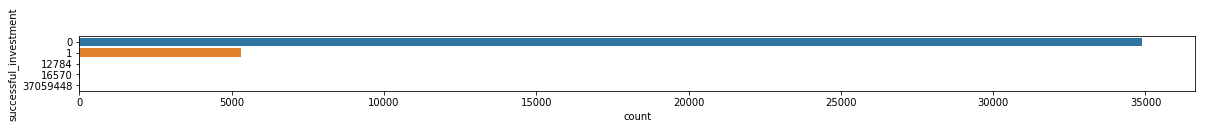

In [0]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='successful_investment',data=train_set);
print(train_set.successful_investment.value_counts())

/home/ankit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
/home/ankit/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ankit/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ankit/anaconda3/lib/python3.7/site-packages/numpy/lib/h

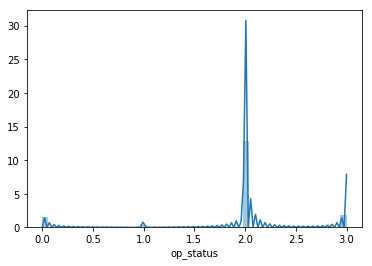

In [0]:
#replacing the categorical value
train_set = train_set.replace({'closed':0,'ipo':1,'operating':2,'acquired':3})
#convert object datatype into float64
train_set = train_set.convert_objects(convert_numeric=True)
sns.distplot(train_set.op_status)

In [0]:
#dealing the missing data
train_set.fillna(train_set.mean(), inplace=True)
#extracting features from dataframe
X = train_set.iloc[:, 0:8].values
y = train_set.iloc[:, 8].values

In [0]:
train_set.describe()

,ID,op_status,total_funding_usd,funding_rounds,num_investors,funding_duration,first_funding_utc,last_funding_utc,successful_investment,Unnamed: 19,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,40213.000000,40213.000000,4.021300e+04,40213.000000,40213.000000,40213.000000,40213.000000,40213.000000,4.021300e+04,40213.000000,40213.0,40213.0,40213.0,40213.0,40213.0
mean,20106.000000,1.900945,2.267153e+07,1.945713,3.767371,436.388133,14988.932781,15425.800607,9.224409e+02,1.000000,13.0,838.0,15553.0,16391.0,0.0
std,11608.637524,0.707256,1.976441e+08,5.350085,4.899507,779.468602,1410.886335,1331.172263,1.848059e+05,0.012215,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,2.000000e+00,1.000000,0.000000,0.000000,0.000000,7358.000000,0.000000e+00,0.000000,13.0,838.0,15553.0,16391.0,0.0
25%,10053.000000,2.000000,1.000000e+06,1.000000,1.000000,0.000000,14096.000000,14868.000000,0.000000e+00,1.000000,13.0,838.0,15553.0,16391.0,0.0
50%,20106.000000,2.000000,7.250000e+06,1.000000,2.000000,0.000000,15400.000000,15893.000000,0.000000e+00,1.000000,13.0,838.0,15553.0,16391.0,0.0
75%,30159.000000,2.000000,2.267153e+07,2.000000,4.000000,615.000000,16071.000000,16391.000000,0.000000e+00,1.000000,13.0,838.0,15553.0,16391.0,0.0
max,40212.000000,3.000000,3.007950e+10,1032.000000,64.000000,36994.000000,16773.000000,53294.000000,3.705945e+07,3.000000,13.0,838.0,15553.0,16391.0,0.0


## Building Model  

In [0]:
# splitting the dataset into test_set and train_set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
#building the binary-classifier
model = XGBClassifier(max_depth=3,learning_rate=0.1,seed=1)
model.fit(X_train,y_train,verbose=True)
#predicting values of test-set
y_pred=model.predict(X_test)
#calculating accuracy
accuracy=accuracy_score(y_test,y_pred)

In [0]:
print(accuracy)

0.999875668282979


# **Preparing the Test set for predictions**

In [0]:
test_dataset = pd.read_csv('test.csv')
test_dataset = test_dataset.drop(columns = ['comp_name','website','founded_on','first_funding_date','last_funding_date'])
test_dataset = test_dataset.drop(columns = ['domain','hq_country_code','hq_state_code','hq_region','hq_city'])
test_dataset = test_dataset.replace({'closed':0,'ipo':1,'operating':2,'acquired':3})
test_dataset = test_dataset.convert_objects(convert_numeric=True)
X1 = test_dataset.iloc[:, 0:8].values

/home/ankit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


# **Predictions**

In [0]:
y_res=model.predict(X1)

# Making the submission csv file

In [0]:
id_vec = np.array([   i   for i in range(0, y_res.shape[0])])
y_res = np.concatenate([np.expand_dims(id_vec, axis=1), np.expand_dims(y_res, axis=1)], axis=1)
#print(y_pred.shape)
predict = pd.DataFrame(data=y_res, columns=['ID', 'successful_investment'])
predict.to_csv("./answer.csv", index=False, header=True)

In [0]:
predict.describe()

,ID,successful_investment
count,4469.000000,4469.000000
mean,2234.000000,0.132021
std,1290.233506,0.338551
min,0.000000,0.000000
25%,1117.000000,0.000000
50%,2234.000000,0.000000
75%,3351.000000,0.000000
max,4468.000000,1.000000


In [0]:
predict.head()

,ID,successful_investment
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


0    3879
1     590
Name: successful_investment, dtype: int64


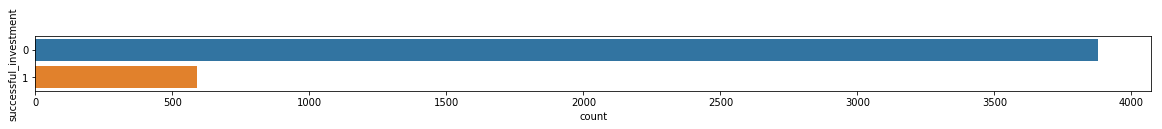

In [0]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='successful_investment',data=predict);
print(predict.successful_investment.value_counts())